In [1]:
%matplotlib inline

### Import packages

In [2]:
# for calculations
import numpy as np
import scipy as sp
import itertools
from scipy.signal import argrelextrema
import copy

# for plotting
import matplotlib
import matplotlib.pylab as plt
from matplotlib.patches import ConnectionPatch

# suppress text output of functions
from IPython.utils import io

# for fitting
from scipy.optimize import curve_fit

#import warnings
#warnings.filterwarnings("error")

import os
import sys
module_path = os.path.abspath(os.path.join('../pyrot'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
import cavity1d as pyrot

### Example system calculation

Define system

In [4]:
tThin = 0.01 #thin layer
N = [1.0,    4.0, 1.0,    4.0, 1.0] # Refractive index of each layer
T = [ -1, tThin, 1.0, tThin,  -1] # Thicknesses of each layer

k = np.linspace(0.001, 15., 200000) # incident frequency / wavenumber

### atom parameters ###
atom_pos   =   0.51 # Position of the atom (measured relative to left cavity surface)
atom_dpol  =   0.05 # dipole moment
atom_om    =   4.35 # transition energy
atom_gamma =   0.0  # spontaneous decay rate into non-radiative channels

In [5]:
cavity = pyrot.Cavity1d(N, T)
atom   = pyrot.CavityAtom1d(N, T, atom_pos, atom_dpol, atom_om, atom_gamma)

Calculate **empty cavity** scattering

In [6]:
%%time
R_empty = cavity.reflection_intensity(k)
T_empty = cavity.transmission_intensity(k)

CPU times: user 329 ms, sys: 78.6 ms, total: 408 ms
Wall time: 409 ms


Calculate reflection minimum

In [7]:
max_inds = argrelextrema(R_empty, np.less)
ref_min = k[max_inds[0][1]]+0.000001 # small number to avoid divide by zeroes
print(ref_min)

4.354557512782565


Calculate cavity scattering **with atom**

In [8]:
%%time
R_atom = atom.linear_reflection_intensity(k)
T_atom = atom.linear_transmission_intensity(k)

CPU times: user 524 ms, sys: 102 ms, total: 626 ms
Wall time: 630 ms


Print linear refractive index with atom delta approximated as thin layer

In [16]:
n_int, t_int = atom.linear_layer_system_with_atom(k)
print(n_int)
print(t_int)

[1.0, 4.0, 1.0, array([14747881.59344435  +0.j        , 13719018.7022      +0.j        ,
       12824348.12602168  +0.j        , ...,
              0.        +297.93325253j,        0.        +297.93013656j,
              0.        +297.92702064j]), 1.0, 4.0, 1.0]
[-1, 0.01, 0.49999999995, 1e-10, 0.49999999995, 0.01, -1]


### Plot

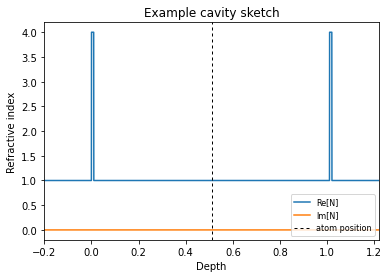

In [10]:
t_tot = np.sum(T[1:-1])
outside_buffer = 0.2
depth = np.linspace(-outside_buffer, t_tot+outside_buffer, 10000)

#cavity.draw_cav(depth)
atom.draw_cav(depth)

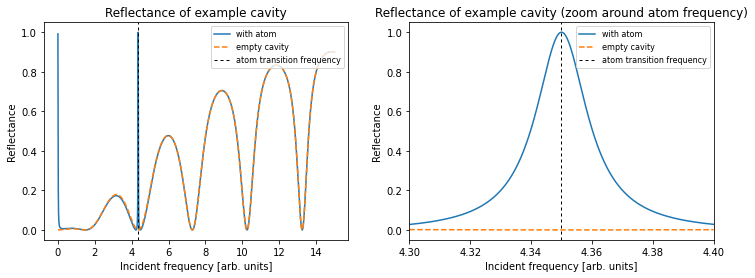

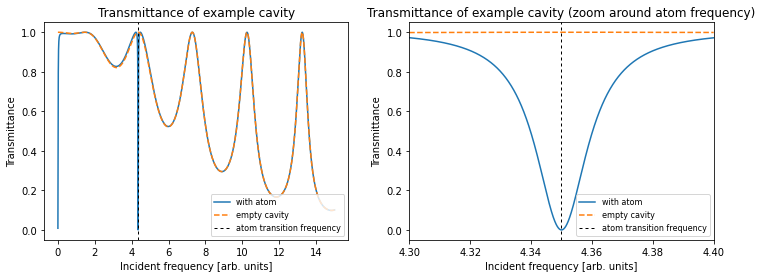

In [26]:
### reflection ###
plt.figure(figsize=(6*2,4))

plt.subplot(121, xlabel='Incident frequency [arb. units]', ylabel='Reflectance',
            title='Reflectance of example cavity')
plt.plot(k, R_atom, label='with atom')
plt.plot(k, R_empty, '--', label='empty cavity')
plt.axvline(atom_om, color='k', dashes=[3,3], lw=1.0, label='atom transition frequency')
plt.legend(loc=1, fontsize=8)

plt.subplot(122, xlabel='Incident frequency [arb. units]', ylabel='Reflectance',
            title='Reflectance of example cavity (zoom around atom frequency)')
plt.plot(k, R_atom, label='with atom')
plt.plot(k, R_empty, '--', label='empty cavity')
plt.axvline(atom_om, color='k', dashes=[3,3], lw=1.0, label='atom transition frequency')

zoom_dif = 0.05
plt.xlim([atom_om-zoom_dif, atom_om+zoom_dif])
plt.legend(loc=1, fontsize=8)

plt.show()

### transmission ###
plt.figure(figsize=(6*2,4))

plt.subplot(121, xlabel='Incident frequency [arb. units]', ylabel='Transmittance',
            title='Transmittance of example cavity')
plt.plot(k, T_atom, label='with atom')
plt.plot(k, T_empty, '--', label='empty cavity')
plt.axvline(atom_om, color='k', dashes=[3,3], lw=1.0, label='atom transition frequency')
plt.legend(loc=4, fontsize=8)

plt.subplot(122, xlabel='Incident frequency [arb. units]', ylabel='Transmittance',
            title='Transmittance of example cavity (zoom around atom frequency)')
plt.plot(k, T_atom, label='with atom')
plt.plot(k, T_empty, '--', label='empty cavity')
plt.axvline(atom_om, color='k', dashes=[3,3], lw=1.0, label='atom transition frequency')

zoom_dif = 0.05
plt.xlim([atom_om-zoom_dif, atom_om+zoom_dif])
plt.legend(loc=4, fontsize=8)

plt.show()